In [1]:
import sys
import warnings
import itertools
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount("/content/deive")

Mounted at /content/deive


In [3]:
path = "/content/deive/MyDrive/Time series forecasting - project coded/Rose.csv"
da = pd.read_csv(path)

In [4]:
da.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [5]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB


In [6]:
da.describe()

,Rose
count,185.000000
mean,90.394595
std,39.175344
min,28.000000
25%,63.000000
50%,86.000000
75%,112.000000
max,267.000000


In [7]:
dates = pd.date_range(start='1980-01-01', freq='MS', periods=len(da))

In [8]:
import calendar
da['Month'] = dates.month
da['Month'] = da['Month'].apply(lambda x: calendar.month_abbr[x]) #spltting into english month names
da['Year'] = dates.year

In [9]:
da.drop(['YearMonth'], axis=1, inplace=True)
da.rename(columns={'Rose':'Rose_Sales'}, inplace=True)
da = da[['Month', 'Year', 'Rose_Sales']]

In [10]:
da.set_index(dates, inplace=True)

In [11]:
da.head()

,Month,Year,Rose_Sales
1980-01-01,Jan,1980,112.0
1980-02-01,Feb,1980,118.0
1980-03-01,Mar,1980,129.0
1980-04-01,Apr,1980,99.0
1980-05-01,May,1980,116.0


In [12]:
monthly_sales_data = pd.pivot_table(da, values = "Rose_Sales", columns = "Year", index = "Month")
monthly_sales_data

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
Month,,,,,,,,,,,,,,,,
Apr,99.0,97.0,97.0,85.0,87.0,93.0,71.0,86.0,66.0,74.0,77.0,65.0,53.0,45.0,48.0,52.0
Aug,129.0,214.0,117.0,124.0,142.0,103.0,118.0,73.0,77.0,74.0,70.0,55.0,52.0,54.0,NaN,NaN
Dec,267.0,226.0,169.0,164.0,159.0,129.0,141.0,157.0,135.0,137.0,132.0,106.0,91.0,77.0,84.0,NaN
Feb,118.0,129.0,77.0,108.0,85.0,82.0,65.0,65.0,115.0,60.0,69.0,55.0,47.0,40.0,35.0,39.0
Jan,112.0,126.0,89.0,75.0,88.0,61.0,57.0,58.0,63.0,71.0,43.0,54.0,34.0,33.0,30.0,30.0
Jul,118.0,222.0,117.0,109.0,87.0,87.0,110.0,87.0,79.0,86.0,78.0,96.0,67.0,57.0,NaN,62.0
Jun,168.0,127.0,121.0,108.0,87.0,75.0,67.0,74.0,83.0,91.0,76.0,65.0,55.0,55.0,45.0,40.0
Mar,129.0,124.0,82.0,115.0,112.0,124.0,67.0,70.0,70.0,89.0,73.0,66.0,56.0,46.0,42.0,45.0
May,116.0,102.0,127.0,101.0,91.0,108.0,76.0,93.0,67.0,73.0,69.0,60.0,53.0,41.0,44.0,28.0


In [13]:
monthly_sales_data = monthly_sales_data.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_sales_data

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
Month,,,,,,,,,,,,,,,,
Jan,112.0,126.0,89.0,75.0,88.0,61.0,57.0,58.0,63.0,71.0,43.0,54.0,34.0,33.0,30.0,30.0
Feb,118.0,129.0,77.0,108.0,85.0,82.0,65.0,65.0,115.0,60.0,69.0,55.0,47.0,40.0,35.0,39.0
Mar,129.0,124.0,82.0,115.0,112.0,124.0,67.0,70.0,70.0,89.0,73.0,66.0,56.0,46.0,42.0,45.0
Apr,99.0,97.0,97.0,85.0,87.0,93.0,71.0,86.0,66.0,74.0,77.0,65.0,53.0,45.0,48.0,52.0
May,116.0,102.0,127.0,101.0,91.0,108.0,76.0,93.0,67.0,73.0,69.0,60.0,53.0,41.0,44.0,28.0
Jun,168.0,127.0,121.0,108.0,87.0,75.0,67.0,74.0,83.0,91.0,76.0,65.0,55.0,55.0,45.0,40.0
Jul,118.0,222.0,117.0,109.0,87.0,87.0,110.0,87.0,79.0,86.0,78.0,96.0,67.0,57.0,NaN,62.0
Aug,129.0,214.0,117.0,124.0,142.0,103.0,118.0,73.0,77.0,74.0,70.0,55.0,52.0,54.0,NaN,NaN
Sep,205.0,118.0,106.0,105.0,95.0,90.0,99.0,101.0,102.0,87.0,83.0,71.0,46.0,46.0,46.0,NaN


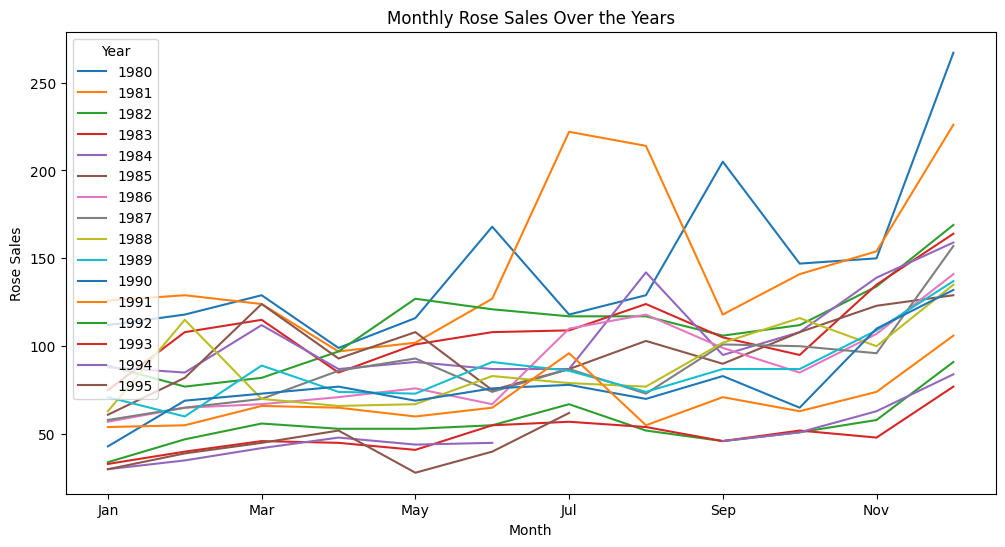

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))  # Set figure size
monthly_sales_data.plot(ax=ax)  # Assign plot to the specified axes
plt.xlabel("Month")  # Label for x-axis
plt.ylabel("Rose Sales")  # Label for y-axis
plt.title("Monthly Rose Sales Over the Years")  # Title for the plot
plt.legend(title="Year")  # Add legend with a title
plt.show()

In [15]:
yearly_sales_data = pd.pivot_table(da, values = "Rose_Sales", columns = "Month", index = "Year")
yearly_sales_data = yearly_sales_data[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
yearly_sales_data

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.0,129.0,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.0,214.0,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.0,117.0,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.0,124.0,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.0,142.0,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.0,103.0,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.0,118.0,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.0,73.0,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.0,77.0,102.0,116.0,100.0,135.0


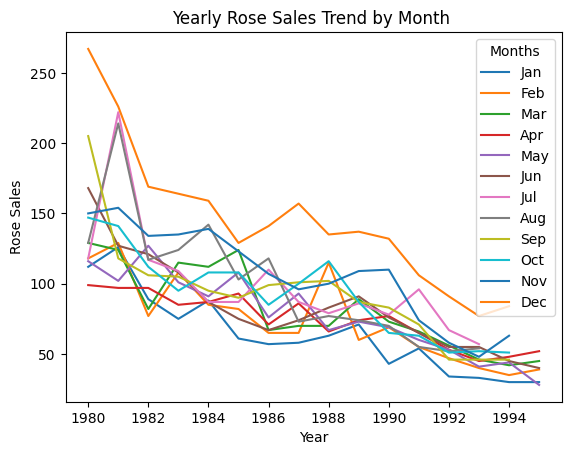

In [16]:
yearly_sales_data.plot()
plt.xlabel("Year")  # Label for x-axis
plt.ylabel("Rose Sales")  # Label for y-axis
plt.title("Yearly Rose Sales Trend by Month ")  # Title for the plot
plt.legend(title="Months")  # Add legend with a title
plt.show()

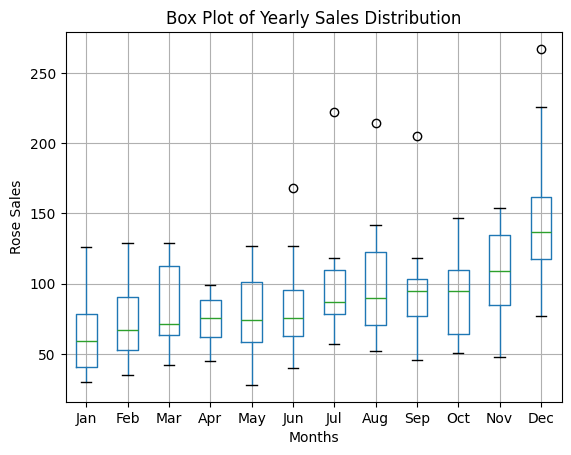

In [17]:
yearly_sales_data.boxplot()
plt.xlabel("Months")  # Label for x-axis
plt.ylabel("Rose Sales")  # Label for y-axis
plt.title("Box Plot of Yearly Sales Distribution")  # Title for the plot
plt.show()

In [18]:
#Time Series Decomposition

In [19]:
print(da.isnull().sum())

Month         0
Year          0
Rose_Sales    2
dtype: int64


In [20]:
print(da.isnull().sum())  # Column-wise count of missing values
print(da.isnull().sum().sum())  # Total missing values in the dataset
print(da[da.isnull().any(axis=1)])  # Rows containing NaN values

Month         0
Year          0
Rose_Sales    2
dtype: int64
2
           Month  Year  Rose_Sales
1994-07-01   Jul  1994         NaN
1994-08-01   Aug  1994         NaN


In [21]:
da = da.ffill()

In [22]:
sales_spr = da["Rose_Sales"]

In [23]:
decomposition = sm.tsa.seasonal_decompose(sales_spr, model='multiplicative')

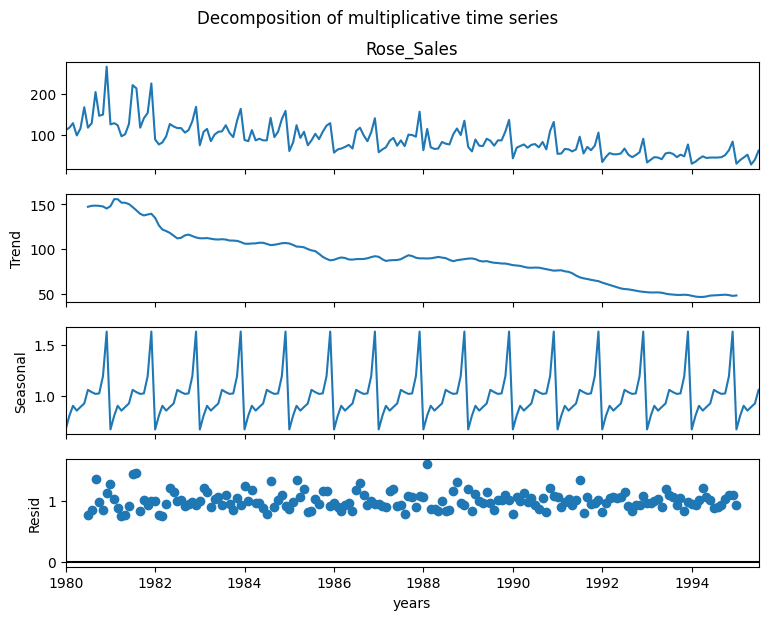

In [24]:
fig = decomposition.plot()
fig.set_figwidth(8)
fig.set_figheight(6)
fig.suptitle('Decomposition of multiplicative time series', y=1.01)
plt.xlabel("years")
plt.show()

In [25]:
print(yearly_sales_data.isnull().sum())  # Column-wise missing values in pivot table
print(yearly_sales_data.isnull().sum().sum())  # Total missing values in pivot table
print(yearly_sales_data[yearly_sales_data.isnull().any(axis=1)])

Month
Jan    0
Feb    0
Mar    0
Apr    0
May    0
Jun    0
Jul    1
Aug    2
Sep    1
Oct    1
Nov    1
Dec    1
dtype: int64
7
Month   Jan   Feb   Mar   Apr   May   Jun   Jul  Aug   Sep   Oct   Nov   Dec
Year                                                                        
1994   30.0  35.0  42.0  48.0  44.0  45.0   NaN  NaN  46.0  51.0  63.0  84.0
1995   30.0  39.0  45.0  52.0  28.0  40.0  62.0  NaN   NaN   NaN   NaN   NaN


<Figure size 1200x600 with 0 Axes>

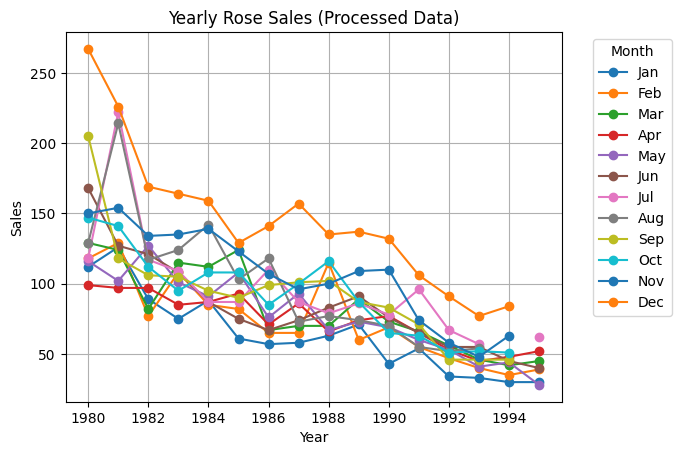

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
yearly_sales_data.plot(marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Yearly Rose Sales (Processed Data)")
plt.legend(title="Month", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()


In [27]:
da['date'] = da.index
train = da[da.index < '1994-01-01']
test = da[da.index >= '1994-01-01']

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1980-01-01 to 1993-12-01
Freq: MS
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       168 non-null    object        
 1   Year        168 non-null    int32         
 2   Rose_Sales  168 non-null    float64       
 3   date        168 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int32(1), object(1)
memory usage: 5.9+ KB


In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19 entries, 1994-01-01 to 1995-07-01
Freq: MS
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       19 non-null     object        
 1   Year        19 non-null     int32         
 2   Rose_Sales  19 non-null     float64       
 3   date        19 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int32(1), object(1)
memory usage: 684.0+ bytes


In [30]:
train.head()

,Month,Year,Rose_Sales,date
1980-01-01,Jan,1980,112.0,1980-01-01
1980-02-01,Feb,1980,118.0,1980-02-01
1980-03-01,Mar,1980,129.0,1980-03-01
1980-04-01,Apr,1980,99.0,1980-04-01
1980-05-01,May,1980,116.0,1980-05-01


ConversionError: Failed to convert value(s) to axis units: '1994-01-01'

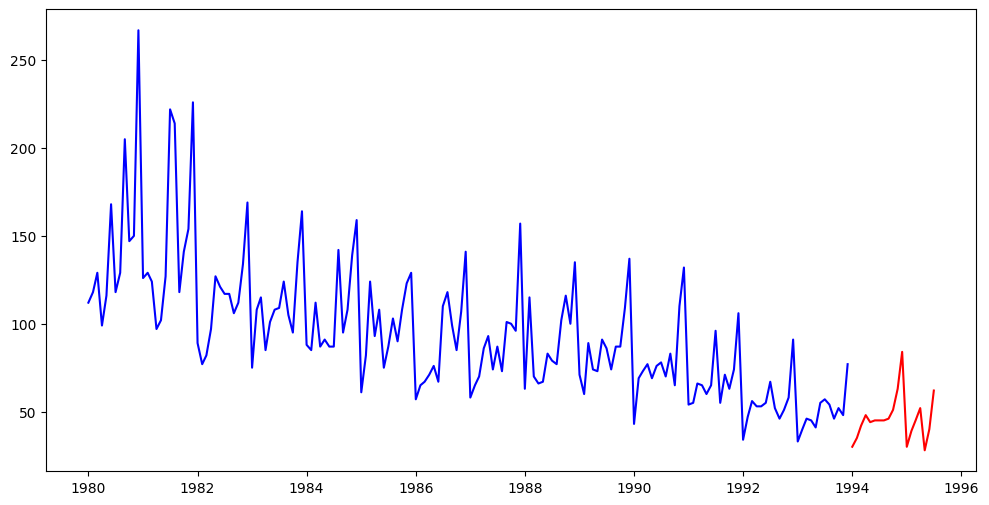

In [31]:
import matplotlib.pyplot as plt

# Plot the full dataset
plt.figure(figsize=(12,6))
plt.plot(train.index, train['Rose_Sales'], label='Training Data', color='blue')
plt.plot(test.index, test['Rose_Sales'], label='Test Data', color='red')

# Formatting the plot
plt.axvline(x='1994-01-01', color='black', linestyle='--', label='Train-Test Split')  # Split line
plt.title('Train-Test Split Visualization')
plt.xlabel('Year')
plt.ylabel('Rose Sales')
plt.legend()
plt.show()


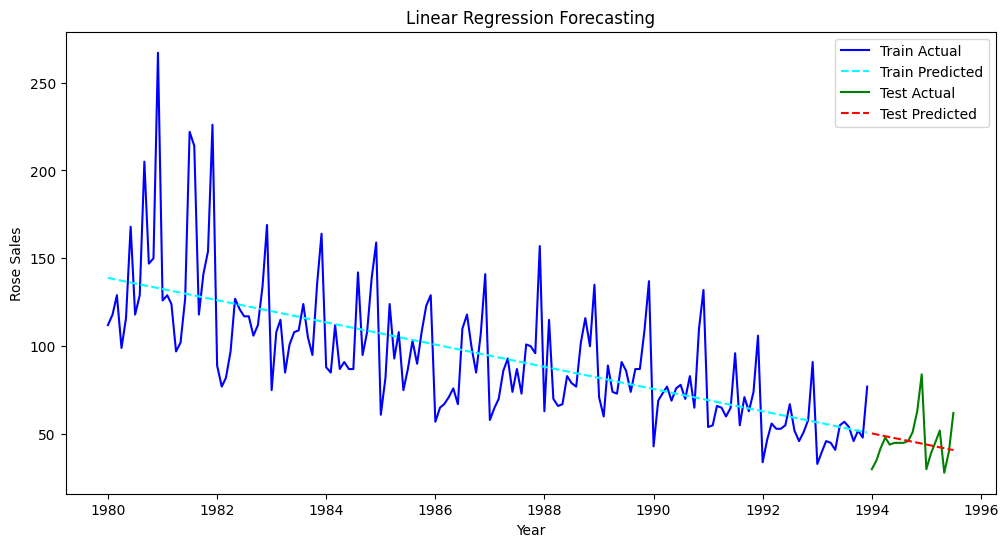

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Convert date index into a numerical feature
da['date_numeric'] = np.arange(len(da))

# Splitting into train and test (using previous split logic)
train = da[da.index < '1994-01-01']
test = da[da.index >= '1994-01-01']

# Define independent (X) and dependent (y) variables
X_train = train['date_numeric'].values.reshape(-1, 1)
y_train = train['Rose_Sales'].values

X_test = test['date_numeric'].values.reshape(-1, 1)
y_test = test['Rose_Sales'].values

# Initialize and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict sales
train['lr_pred'] = lr_model.predict(X_train)
test['lr_pred'] = lr_model.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(train.index, train['Rose_Sales'], label="Train Actual", color='blue')
plt.plot(train.index, train['lr_pred'], label="Train Predicted", linestyle="dashed", color='cyan')
plt.plot(test.index, test['Rose_Sales'], label="Test Actual", color='green')
plt.plot(test.index, test['lr_pred'], label="Test Predicted", linestyle="dashed", color='red')
plt.xlabel("Year")
plt.ylabel("Rose Sales")
plt.title("Linear Regression Forecasting")
plt.legend()
plt.show()


In [33]:
# Simple avg method

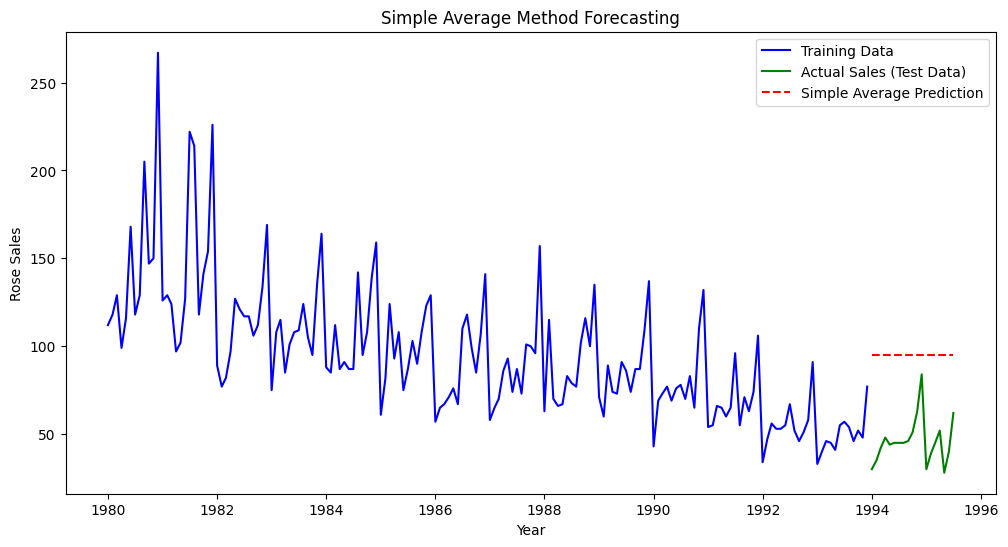

In [34]:
# Calculate the Simple Average from training data
simple_avg = train["Rose_Sales"].mean()

# Generate predictions for test data
test["Simple_Avg_Pred"] = simple_avg

# Plot Actual vs. Predicted Sales
plt.figure(figsize=(12, 6))
plt.plot(train.index, train["Rose_Sales"], label="Training Data", color="blue")
plt.plot(test.index, test["Rose_Sales"], label="Actual Sales (Test Data)", color="green")
plt.plot(test.index, test["Simple_Avg_Pred"], label="Simple Average Prediction", color="red", linestyle="dashed")

plt.xlabel("Year")
plt.ylabel("Rose Sales")
plt.title("Simple Average Method Forecasting")
plt.legend()
plt.show()

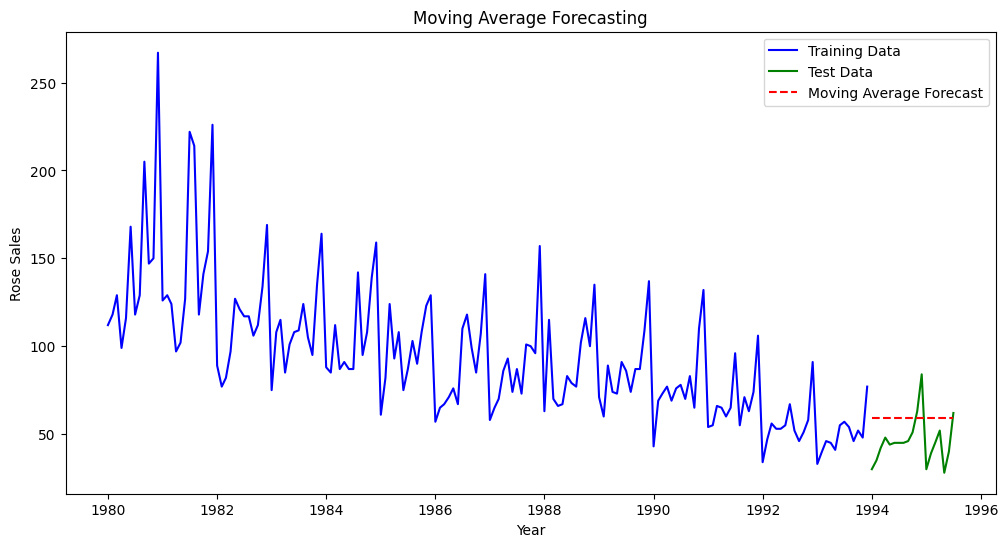

In [35]:
window_size = 3  # Adjust the window size as needed
train['Moving_Avg'] = train['Rose_Sales'].rolling(window=window_size).mean()

# Forecasting using the last moving average value
moving_avg_forecast = train['Moving_Avg'].iloc[-1]
test['Moving_Avg_Forecast'] = moving_avg_forecast

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Rose_Sales'], label='Training Data', color='blue')
plt.plot(test.index, test['Rose_Sales'], label='Test Data', color='green')
plt.plot(test.index, test['Moving_Avg_Forecast'], label='Moving Average Forecast', color='red', linestyle='dashed')

plt.xlabel('Year')
plt.ylabel('Rose Sales')
plt.title('Moving Average Forecasting')
plt.legend()
plt.show()


In [36]:
#simple exponential smoothing

/usr/local/lib/python3.11/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


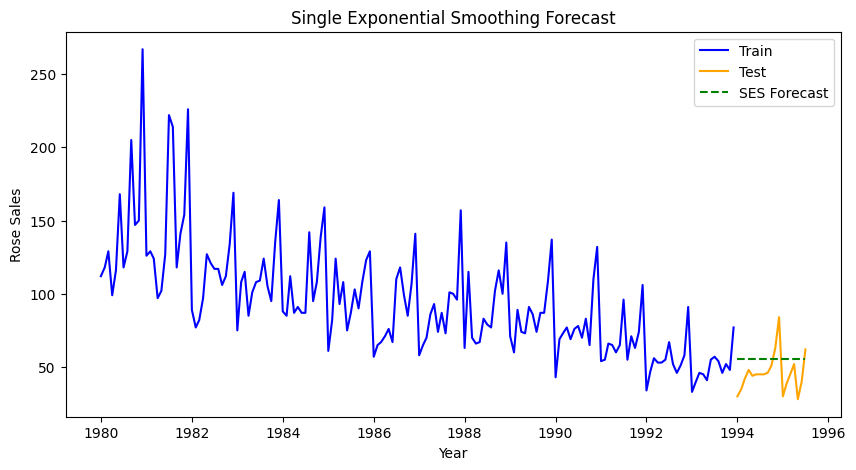

In [37]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Fit the Single Exponential Smoothing model
ses_model = SimpleExpSmoothing(train['Rose_Sales']).fit(smoothing_level=0.2, optimized=True)

# Generate predictions
ses_predictions = ses_model.forecast(len(test))

# Plot the results
plt.figure(figsize=(10,5))
plt.plot(train.index, train['Rose_Sales'], label='Train', color='blue')
plt.plot(test.index, test['Rose_Sales'], label='Test', color='orange')
plt.plot(test.index, ses_predictions, label='SES Forecast', color='green', linestyle='dashed')
plt.title('Single Exponential Smoothing Forecast')
plt.xlabel('Year')
plt.ylabel('Rose Sales')
plt.legend()
plt.show()

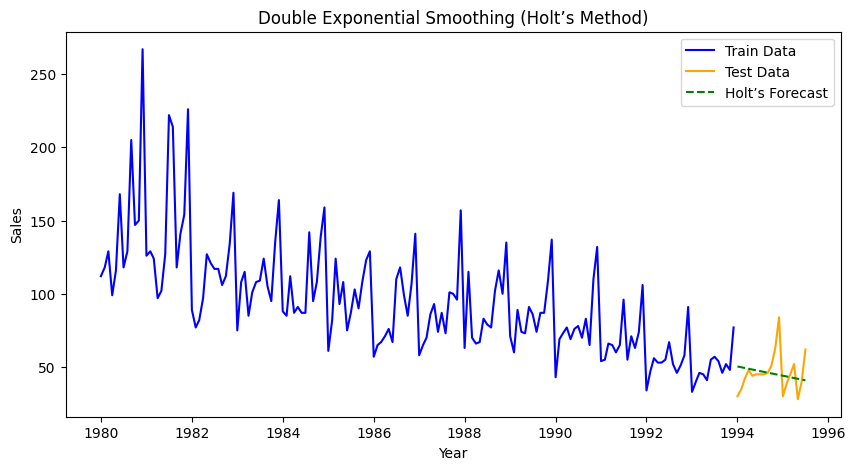

In [38]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Apply Double Exponential Smoothing (Holt’s Method)
holt_model = ExponentialSmoothing(train['Rose_Sales'], trend='add', seasonal=None, damped_trend=False).fit()

# Forecasting on test data
holt_forecast = holt_model.forecast(len(test))

# Plot results
plt.figure(figsize=(10,5))
plt.plot(train.index, train['Rose_Sales'], label='Train Data', color='blue')
plt.plot(test.index, test['Rose_Sales'], label='Test Data', color='orange')
plt.plot(test.index, holt_forecast, label='Holt’s Forecast', linestyle='dashed', color='green')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Double Exponential Smoothing (Holt’s Method)')
plt.legend()
plt.show()


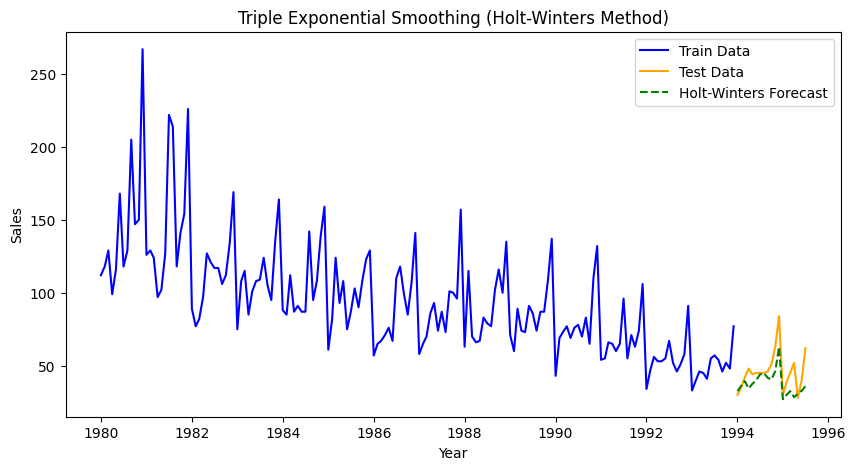

In [39]:
# Apply Triple Exponential Smoothing (Holt-Winters Method)
holt_winters_model = ExponentialSmoothing(
    train['Rose_Sales'],
    trend='add',
    seasonal='mul',
    seasonal_periods=12,
    damped_trend=False
).fit()

# Forecasting on test data
holt_winters_forecast = holt_winters_model.forecast(len(test))

# Plot results
plt.figure(figsize=(10,5))
plt.plot(train.index, train['Rose_Sales'], label='Train Data', color='blue')
plt.plot(test.index, test['Rose_Sales'], label='Test Data', color='orange')
plt.plot(test.index, holt_winters_forecast, label='Holt-Winters Forecast', linestyle='dashed', color='green')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Triple Exponential Smoothing (Holt-Winters Method)')
plt.legend()
plt.show()


In [40]:
from sklearn.metrics import mean_squared_error

# Calculate MSE for each model
mse_lr = mean_squared_error(test['Rose_Sales'], test['lr_pred'])  # FIXED
mse_sa = mean_squared_error(test['Rose_Sales'], test['Simple_Avg_Pred'])
mse_ma = mean_squared_error(test['Rose_Sales'], test['Moving_Avg_Forecast'])
mse_ses = mean_squared_error(test['Rose_Sales'], ses_predictions)
mse_holt = mean_squared_error(test['Rose_Sales'], holt_forecast)
mse_hw = mean_squared_error(test['Rose_Sales'], holt_winters_forecast)

# Display results
mse_results = pd.DataFrame({
    "Model": ["Linear Regression", "Simple Average", "Moving Average",
              "Simple Exponential Smoothing", "Holt’s Method", "Holt-Winters Method"],
    "MSE": [mse_lr, mse_sa, mse_ma, mse_ses, mse_holt, mse_hw]
})

print(mse_results.sort_values(by="MSE"))


                          Model          MSE
5           Holt-Winters Method   140.451668
0             Linear Regression   188.480464
4                 Holt’s Method   188.480523
3  Simple Exponential Smoothing   258.040668
2                Moving Average   333.210526
1                Simple Average  2552.976151


Augmented Dickey-Fuller Test Results:
ADF Statistic: -1.874855541719994
p-value: 0.34398071933430197
Critical Values:
	1%: -3.4687256239864017
	5%: -2.8783961376954363
	10%: -2.57575634100705
Conclusion: The data is non-stationary (fail to reject null hypothesis).


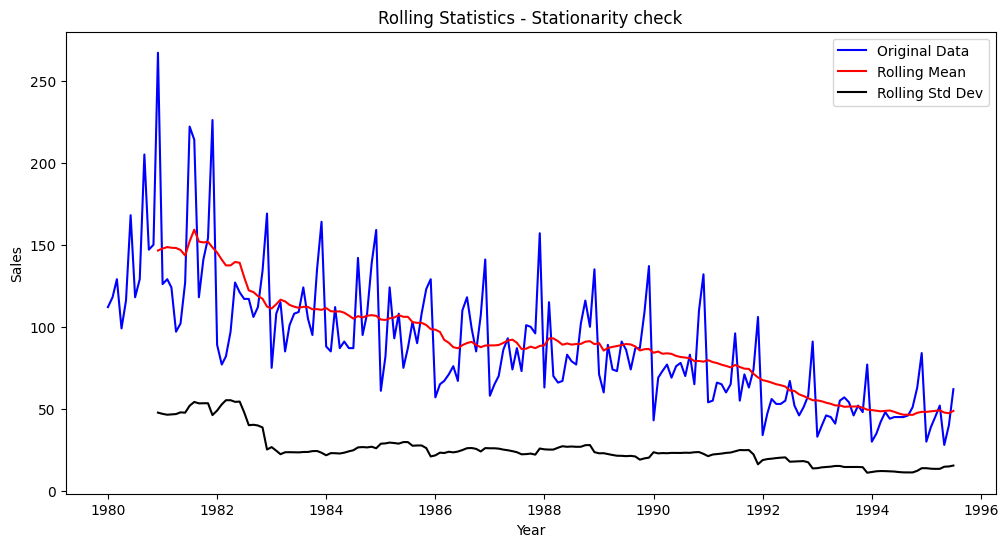

In [41]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller Test
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print("Augmented Dickey-Fuller Test Results:")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"\t{key}: {value}")
    if result[1] <= 0.05:
        print("Conclusion: The data is stationary (reject null hypothesis).")
    else:
        print("Conclusion: The data is non-stationary (fail to reject null hypothesis).")

# Apply ADF test on the original data
adf_test(da['Rose_Sales'])

# Rolling Mean and Standard Deviation
plt.figure(figsize=(12,6))
rolling_mean = da['Rose_Sales'].rolling(window=12).mean()
rolling_std = da['Rose_Sales'].rolling(window=12).std()

plt.plot(da['Rose_Sales'], label="Original Data", color="blue")
plt.plot(rolling_mean, label="Rolling Mean", color="red")
plt.plot(rolling_std, label="Rolling Std Dev", color="black")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Rolling Statistics - Stationarity check")
plt.legend()
plt.show()


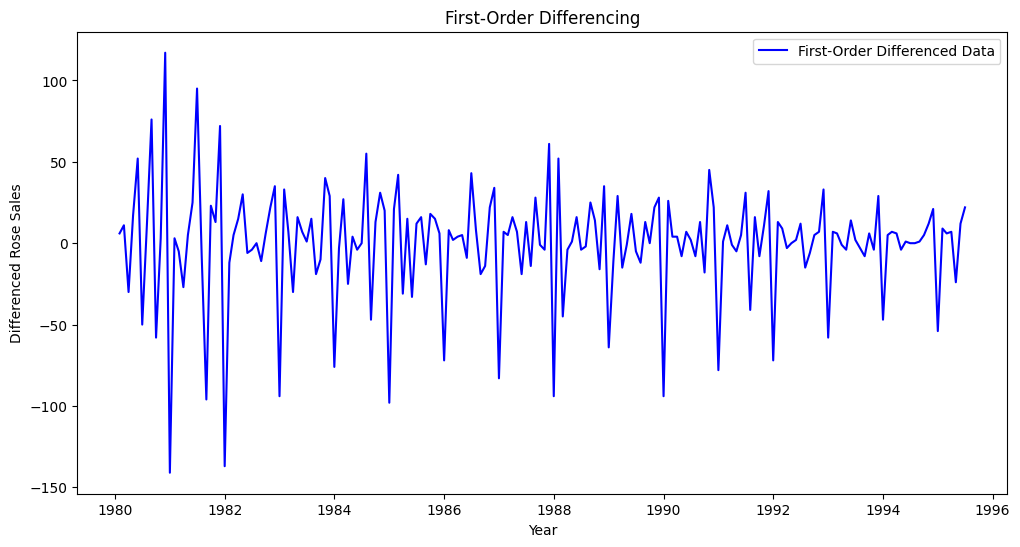

ADF Test Results after First-Order Differencing:
Test Statistic: -8.04413902007526
P-Value: 1.8135795068098554e-12
Critical Values: {'1%': -3.4687256239864017, '5%': -2.8783961376954363, '10%': -2.57575634100705}


In [42]:
# Apply first-order differencing
da['Sales_Diff'] = da['Rose_Sales'].diff()

# Drop NA values resulting from differencing
da.dropna(inplace=True)

# Plot the differenced data
plt.figure(figsize=(12, 6))
plt.plot(da.index, da['Sales_Diff'], color='blue', label='First-Order Differenced Data')
plt.xlabel('Year')
plt.ylabel('Differenced Rose Sales')
plt.title('First-Order Differencing')
plt.legend()
plt.show()

# Perform ADF Test again
adf_test = adfuller(da['Sales_Diff'].dropna())
print("ADF Test Results after First-Order Differencing:")
print(f"Test Statistic: {adf_test[0]}")
print(f"P-Value: {adf_test[1]}")
print(f"Critical Values: {adf_test[4]}")


In [43]:
# ACF plot and Pacf

<Figure size 600x400 with 0 Axes>

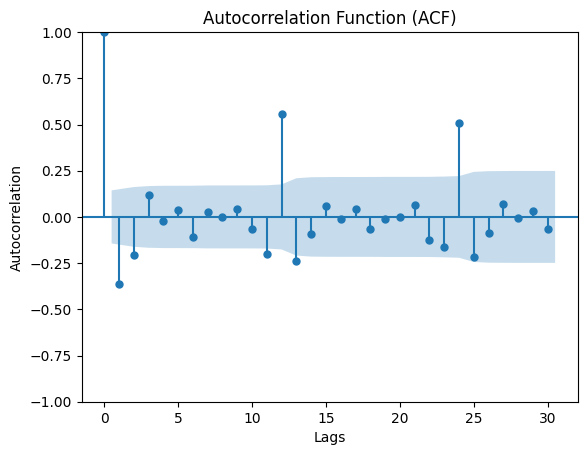

In [44]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot ACF
plt.figure(figsize=(6, 4))
plot_acf(da['Sales_Diff'].dropna(), lags=30)
plt.title("Autocorrelation Function (ACF)")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.show()


<Figure size 600x400 with 0 Axes>

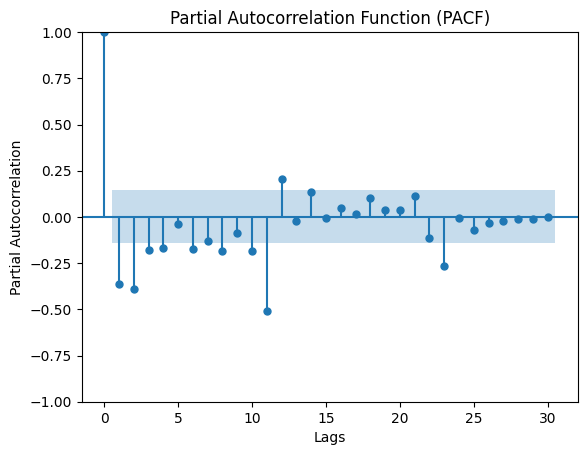

In [45]:
from statsmodels.graphics.tsaplots import plot_pacf

# Plot PACF
plt.figure(figsize=(6, 4))
plot_pacf(da['Sales_Diff'].dropna(), lags=30)
plt.title("Partial Autocorrelation Function (PACF)")
plt.xlabel("Lags")
plt.ylabel("Partial Autocorrelation")
plt.show()


In [46]:
!pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 56.5 MB/s eta 0:00:00


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.63 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1845.396, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1821.172, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1843.410, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1792.621, Time=0.39 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1788.813, Time=0.45 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1785.574, Time=0.66 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=1787.244, Time=1.26 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.26 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.68 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=6.80 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=1783.800, Time=0.23 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=1786.958, Time=0.40 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=1785.494, Time=0

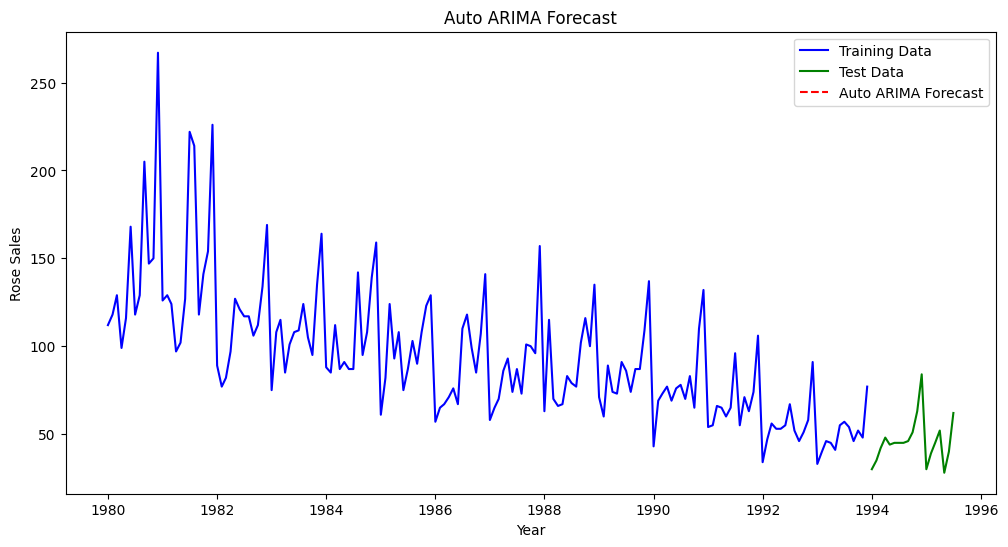

In [47]:
from pmdarima import auto_arima

# Fit Auto ARIMA model
auto_arima_model = auto_arima(da['Rose_Sales'], seasonal=False, stepwise=True, trace=True)

# Print the best ARIMA order (p, d, q)
print(f"Optimal ARIMA Order: {auto_arima_model.order}")

# Forecast using Auto ARIMA
forecast_auto_arima = auto_arima_model.predict(n_periods=len(test))

# Add forecasted values to test data
test['Auto_ARIMA_Forecast'] = forecast_auto_arima

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Rose_Sales'], label="Training Data", color="blue")
plt.plot(test.index, test['Rose_Sales'], label="Test Data", color="green")
plt.plot(test.index, test['Auto_ARIMA_Forecast'], label="Auto ARIMA Forecast", color="red", linestyle="dashed")
plt.xlabel("Year")
plt.ylabel("Rose Sales")
plt.title("Auto ARIMA Forecast")
plt.legend()
plt.show()


In [48]:
print(len(forecast_auto_arima))  # Should be 19
print(len(test))  # Should also be 19

19
19


In [49]:
test['Auto_ARIMA_Forecast'] = pd.Series(forecast_auto_arima, index=test.index)


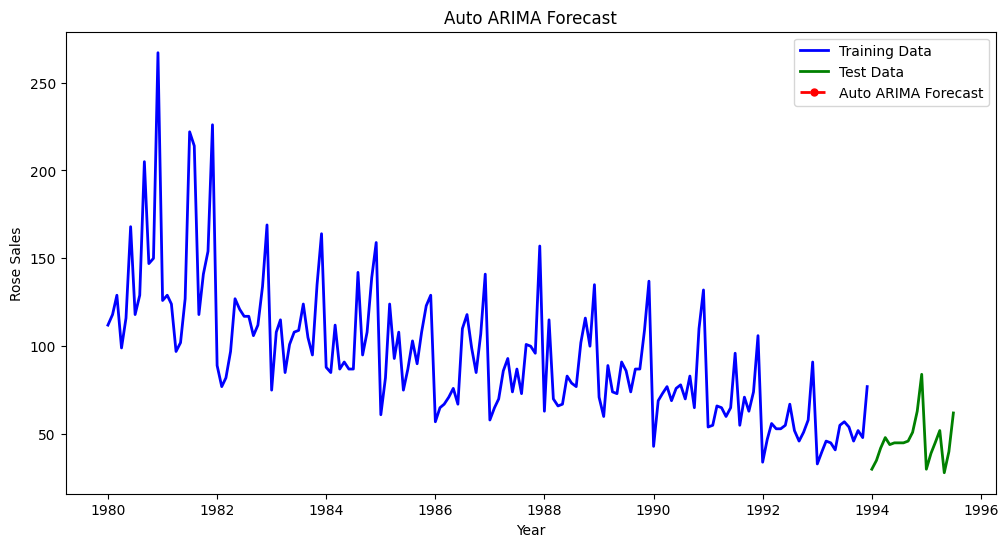

In [50]:
plt.figure(figsize=(12, 6))

# Plot Training Data
plt.plot(train.index, train['Rose_Sales'], label="Training Data", color="blue", linewidth=2)

# Plot Test Data
plt.plot(test.index, test['Rose_Sales'], label="Test Data", color="green", linewidth=2)

# Plot Auto ARIMA Forecast with proper formatting
plt.plot(test.index, test['Auto_ARIMA_Forecast'], label="Auto ARIMA Forecast",
         color="red", linestyle="dashed", linewidth=2, marker='o', markersize=5)

# Labels and Title
plt.xlabel("Year")
plt.ylabel("Rose Sales")
plt.title("Auto ARIMA Forecast")

# Display Legend
plt.legend()
plt.show()


In [51]:
print(test['Auto_ARIMA_Forecast'].isnull().sum())  # Should be 0



19


In [52]:
print(type(forecast_auto_arima))
print(forecast_auto_arima.shape)
print(forecast_auto_arima)

<class 'pandas.core.series.Series'>
(19,)
1995-08-01    54.436701
1995-09-01    43.552393
1995-10-01    52.501902
1995-11-01    44.911506
1995-12-01    51.530203
1996-01-01    45.621748
1996-02-01    50.997122
1996-03-01    46.034112
1996-04-01    50.667655
1996-05-01    46.306049
1996-06-01    50.436205
1996-07-01    46.508483
1996-08-01    50.255042
1996-09-01    46.673626
1996-10-01    50.102338
1996-11-01    46.816353
1996-12-01    49.967879
1997-01-01    46.943752
1997-02-01    49.846673
Freq: MS, dtype: float64


In [53]:
test['Auto_ARIMA_Forecast'] = pd.Series(forecast_auto_arima.values, index=test.index)

# Verify if null values are still present
print(test['Auto_ARIMA_Forecast'].isnull().sum())  # Should be 0


0


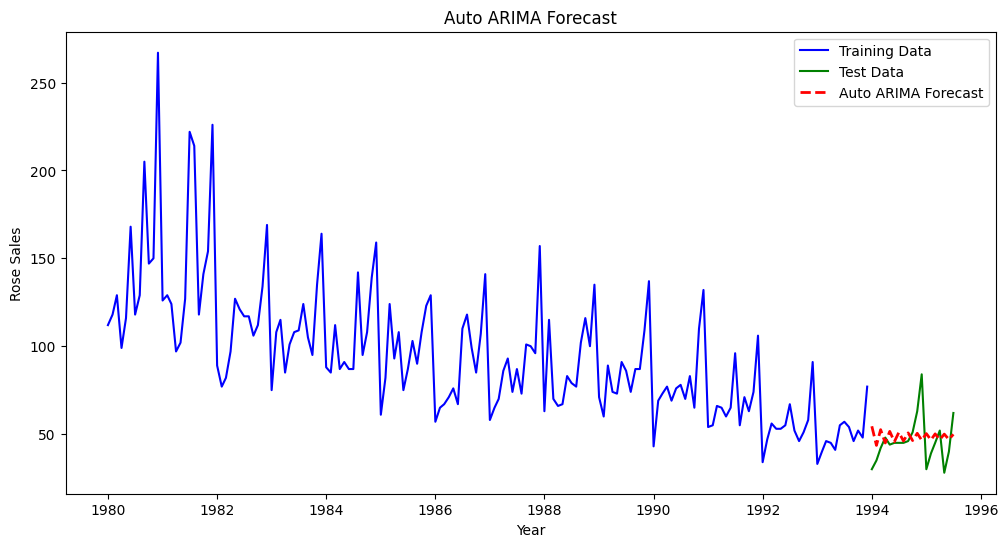

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Rose_Sales'], label="Training Data", color="blue")
plt.plot(test.index, test['Rose_Sales'], label="Test Data", color="green")
plt.plot(test.index, test['Auto_ARIMA_Forecast'], label="Auto ARIMA Forecast",
         color="red", linestyle="dashed", linewidth=2)
plt.xlabel("Year")
plt.ylabel("Rose Sales")
plt.title("Auto ARIMA Forecast")
plt.legend()
plt.show()


In [55]:

print(test[['Rose_Sales', 'Auto_ARIMA_Forecast']].head(10))  # Check first 10 rows


            Rose_Sales  Auto_ARIMA_Forecast
1994-01-01        30.0            54.436701
1994-02-01        35.0            43.552393
1994-03-01        42.0            52.501902
1994-04-01        48.0            44.911506
1994-05-01        44.0            51.530203
1994-06-01        45.0            45.621748
1994-07-01        45.0            50.997122
1994-08-01        45.0            46.034112
1994-09-01        46.0            50.667655
1994-10-01        51.0            46.306049


In [56]:
print(auto_arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  186
Model:               SARIMAX(2, 1, 3)   Log Likelihood                -871.080
Date:                Sun, 09 Mar 2025   AIC                           1754.161
Time:                        09:38:23   BIC                           1773.483
Sample:                    02-01-1980   HQIC                          1761.992
                         - 07-01-1995                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6292      0.091    -17.819      0.000      -1.808      -1.450
ar.L2         -0.6422      0.091     -7.032      0.000      -0.821      -0.463
ma.L1          0.9894      0.082     12.029      0.0

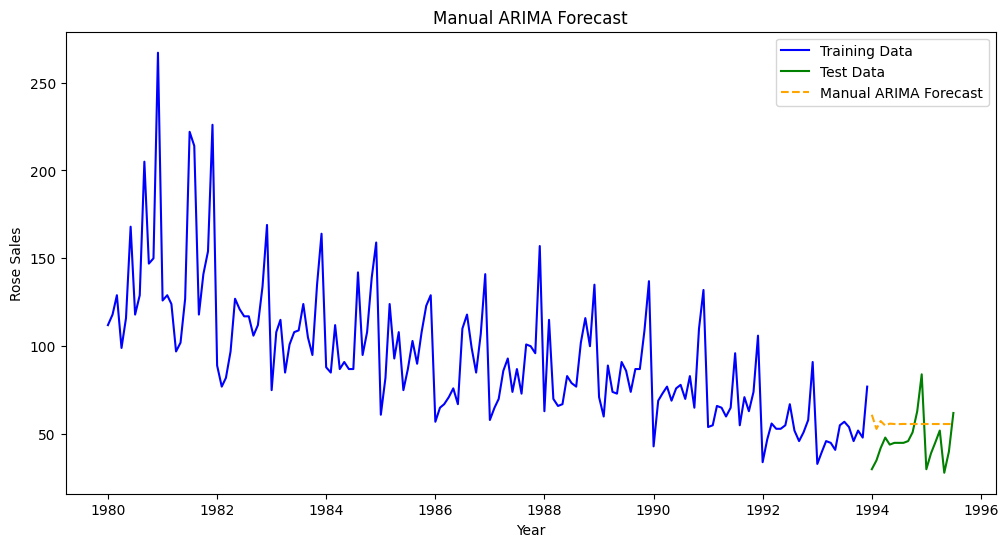

In [57]:
from statsmodels.tsa.arima.model import ARIMA

# Define ARIMA order based on ACF & PACF analysis
p, d, q = 4, 1, 2  # Update these values based on your ACF & PACF results

# Fit ARIMA model
manual_arima_model = ARIMA(train['Rose_Sales'], order=(p, d, q))
manual_arima_result = manual_arima_model.fit()

# Forecast using Manual ARIMA
forecast_manual_arima = manual_arima_result.forecast(steps=len(test))

# Add forecasted values to test data
test['Manual_ARIMA_Forecast'] = forecast_manual_arima

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Rose_Sales'], label="Training Data", color="blue")
plt.plot(test.index, test['Rose_Sales'], label="Test Data", color="green")
plt.plot(test.index, test['Manual_ARIMA_Forecast'], label="Manual ARIMA Forecast", color="orange", linestyle="dashed")
plt.xlabel("Year")
plt.ylabel("Rose Sales")
plt.title("Manual ARIMA Forecast")
plt.legend()
plt.show()


In [58]:
#sarnma

In [59]:
train.head()

,Month,Year,Rose_Sales,date,date_numeric,lr_pred,Moving_Avg
1980-01-01,Jan,1980,112.0,1980-01-01,0,138.859890,NaN
1980-02-01,Feb,1980,118.0,1980-02-01,1,138.333125,NaN
1980-03-01,Mar,1980,129.0,1980-03-01,2,137.806360,119.666667
1980-04-01,Apr,1980,99.0,1980-04-01,3,137.279595,115.333333
1980-05-01,May,1980,116.0,1980-05-01,4,136.752830,114.666667


In [60]:
print(train.index.dtype)

datetime64[ns]


In [61]:

print(train.dtypes)


Month                   object
Year                     int32
Rose_Sales             float64
date            datetime64[ns]
date_numeric             int64
lr_pred                float64
Moving_Avg             float64
dtype: object


In [62]:
train.head()

,Month,Year,Rose_Sales,date,date_numeric,lr_pred,Moving_Avg
1980-01-01,Jan,1980,112.0,1980-01-01,0,138.859890,NaN
1980-02-01,Feb,1980,118.0,1980-02-01,1,138.333125,NaN
1980-03-01,Mar,1980,129.0,1980-03-01,2,137.806360,119.666667
1980-04-01,Apr,1980,99.0,1980-04-01,3,137.279595,115.333333
1980-05-01,May,1980,116.0,1980-05-01,4,136.752830,114.666667


In [63]:
train['Sales_Diff'] = train['Rose_Sales'].diff()

In [64]:
train1 = train[['Sales_Diff']]  # Keep only the numeric time series column


In [65]:
train1.head()

,Sales_Diff
1980-01-01,NaN
1980-02-01,6.0
1980-03-01,11.0
1980-04-01,-30.0
1980-05-01,17.0


In [66]:
train1 = train1.fillna(0)

In [67]:

train1.head()

,Sales_Diff
1980-01-01,0.0
1980-02-01,6.0
1980-03-01,11.0
1980-04-01,-30.0
1980-05-01,17.0


In [68]:
test['Sales_Diff'] = test['Rose_Sales'].diff()

In [69]:
test1 = test[['Sales_Diff']]

In [70]:
test1.head()

,Sales_Diff
1994-01-01,NaN
1994-02-01,5.0
1994-03-01,7.0
1994-04-01,6.0
1994-05-01,-4.0


In [71]:
test1 = test.fillna(0)

In [72]:
test1.head()

,Month,Year,Rose_Sales,date,date_numeric,lr_pred,Simple_Avg_Pred,Moving_Avg_Forecast,Auto_ARIMA_Forecast,Manual_ARIMA_Forecast,Sales_Diff
1994-01-01,Jan,1994,30.0,1994-01-01,168,50.363345,94.875,59.0,54.436701,60.996378,0.0
1994-02-01,Feb,1994,35.0,1994-02-01,169,49.836580,94.875,59.0,43.552393,52.950344,5.0
1994-03-01,Mar,1994,42.0,1994-03-01,170,49.309814,94.875,59.0,52.501902,57.405170,7.0
1994-04-01,Apr,1994,48.0,1994-04-01,171,48.783049,94.875,59.0,44.911506,54.822575,6.0
1994-05-01,May,1994,44.0,1994-05-01,172,48.256284,94.875,59.0,51.530203,55.924842,-4.0


In [73]:
from pmdarima import auto_arima

# Run Auto SARIMA
auto_sarima_model = auto_arima(train1, seasonal=True, m=12, stepwise=True, suppress_warnings=True)
print(auto_sarima_model.summary())


                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  168
Model:             SARIMAX(1, 0, 2)x(2, 0, [], 12)   Log Likelihood                -764.930
Date:                             Sun, 09 Mar 2025   AIC                           1541.861
Time:                                     09:40:27   BIC                           1560.604
Sample:                                 01-01-1980   HQIC                          1549.468
                                      - 12-01-1993                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5069      0.167     -3.029      0.002      -0.835      -0.179
ma.L1         -0.1896      

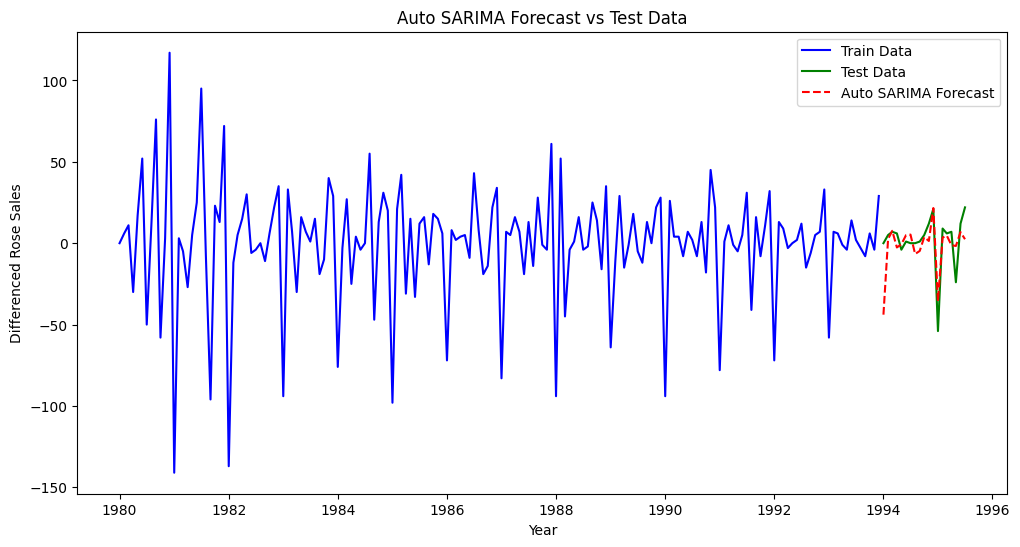

In [74]:
# Forecast using Auto SARIMA
n_forecast = len(test1)  # Forecast for the length of the test data
auto_sarima_forecast = auto_sarima_model.predict(n_periods=n_forecast)

# Create date index for forecast
forecast_index = test1.index  # Using test data index for alignment

# Plot the forecast along with train and test data
plt.figure(figsize=(12, 6))
plt.plot(train1.index, train1['Sales_Diff'], label='Train Data', color='blue')
plt.plot(test1.index, test1['Sales_Diff'], label='Test Data', color='green')
plt.plot(forecast_index, auto_sarima_forecast, label='Auto SARIMA Forecast', color='red', linestyle='dashed')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Differenced Rose Sales')
plt.title('Auto SARIMA Forecast vs Test Data')
plt.legend()
plt.show()


In [75]:
# manual sarima

In [76]:
print(type(test1))
print(test1.shape)

<class 'pandas.core.frame.DataFrame'>
(19, 11)


In [77]:
da['Seasonal_Diff'] = da['Rose_Sales'] - da['Rose_Sales'].shift(12)


In [78]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(da['Rose_Sales'].dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

if result[1] < 0.05:
    print("The data is stationary after seasonal differencing (D=1).")
else:
    print("The data is still non-stationary; consider D=2.")


ADF Statistic: -1.924822681379036
p-value: 0.3204753372906027
The data is still non-stationary; consider D=2.


In [79]:
da['Seasonal_Diff2'] = da['Seasonal_Diff'] - da['Seasonal_Diff'].shift(12)


In [80]:
result2 = adfuller(da['Seasonal_Diff2'].dropna())
print(f'ADF Statistic: {result2[0]}')
print(f'p-value: {result2[1]}')

if result2[1] < 0.05:
    print("The data is now stationary after applying D=2.")
else:
    print("The data is still non-stationary, consider further differencing.")


ADF Statistic: -6.867534244317472
p-value: 1.5453345925876386e-09
The data is now stationary after applying D=2.


In [81]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define & fit the Manual SARIMA model with your chosen (p, d, q) and (P, D, Q, s)
manual_sarima_model = SARIMAX(train1['Sales_Diff'],
                              order=(4,1,2),  # (p, d, q)
                              seasonal_order=(2,2,2,12),  # (P, D, Q, s)
                              enforce_stationarity=False,
                              enforce_invertibility=False)

manual_sarima_result = manual_sarima_model.fit()  # Fit the model


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


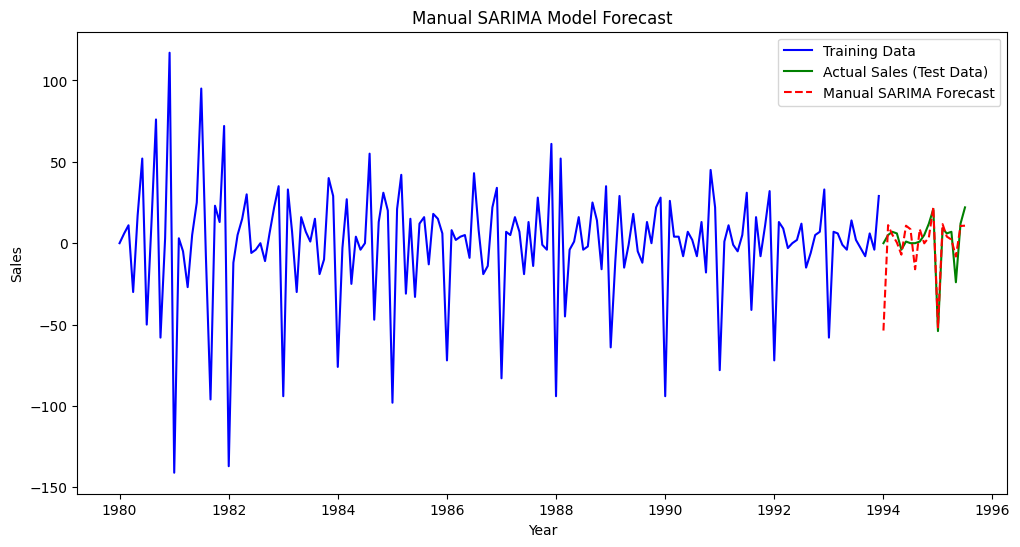

In [82]:
# Forecast using the Manual SARIMA model
n_forecast = len(test1)  # Number of periods to forecast
manual_sarima_pred = manual_sarima_result.forecast(steps=n_forecast)  # Use fitted model for forecasting
manual_sarima_pred = pd.Series(manual_sarima_pred, index=test1.index)  # Align with test data index

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train1.index, train1, label="Training Data", color="blue")
plt.plot(test1.index, test1['Sales_Diff'], label="Actual Sales (Test Data)", color="green")
plt.plot(test1.index, manual_sarima_pred, label="Manual SARIMA Forecast", color="red", linestyle="dashed")

# Labels & title
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Manual SARIMA Model Forecast")
plt.legend()
plt.show()


In [83]:
test

,Month,Year,Rose_Sales,date,date_numeric,lr_pred,Simple_Avg_Pred,Moving_Avg_Forecast,Auto_ARIMA_Forecast,Manual_ARIMA_Forecast,Sales_Diff
1994-01-01,Jan,1994,30.0,1994-01-01,168,50.363345,94.875,59.0,54.436701,60.996378,NaN
1994-02-01,Feb,1994,35.0,1994-02-01,169,49.836580,94.875,59.0,43.552393,52.950344,5.0
1994-03-01,Mar,1994,42.0,1994-03-01,170,49.309814,94.875,59.0,52.501902,57.405170,7.0
1994-04-01,Apr,1994,48.0,1994-04-01,171,48.783049,94.875,59.0,44.911506,54.822575,6.0
1994-05-01,May,1994,44.0,1994-05-01,172,48.256284,94.875,59.0,51.530203,55.924842,-4.0
1994-06-01,Jun,1994,45.0,1994-06-01,173,47.729519,94.875,59.0,45.621748,55.728617,1.0
1994-07-01,Jul,1994,45.0,1994-07-01,174,47.202754,94.875,59.0,50.997122,55.663267,0.0
1994-08-01,Aug,1994,45.0,1994-08-01,175,46.675989,94.875,59.0,46.034112,55.760929,0.0
1994-09-01,Sep,1994,46.0,1994-09-01,176,46.149224,94.875,59.0,50.667655,55.698209,1.0
1994-10-01,Oct,1994,51.0,1994-10-01,177,45.622458,94.875,59.0,46.306049,55.724980,5.0


In [84]:
print(test.columns)

Index(['Month', 'Year', 'Rose_Sales', 'date', 'date_numeric', 'lr_pred',
       'Simple_Avg_Pred', 'Moving_Avg_Forecast', 'Auto_ARIMA_Forecast',
       'Manual_ARIMA_Forecast', 'Sales_Diff'],
      dtype='object')


In [85]:
[var for var in vars() if 'sarima' in var.lower()]

['auto_sarima_model',
 'auto_sarima_forecast',
 'SARIMAX',
 'manual_sarima_model',
 'manual_sarima_result',
 'manual_sarima_pred']

In [86]:
test1

,Month,Year,Rose_Sales,date,date_numeric,lr_pred,Simple_Avg_Pred,Moving_Avg_Forecast,Auto_ARIMA_Forecast,Manual_ARIMA_Forecast,Sales_Diff
1994-01-01,Jan,1994,30.0,1994-01-01,168,50.363345,94.875,59.0,54.436701,60.996378,0.0
1994-02-01,Feb,1994,35.0,1994-02-01,169,49.836580,94.875,59.0,43.552393,52.950344,5.0
1994-03-01,Mar,1994,42.0,1994-03-01,170,49.309814,94.875,59.0,52.501902,57.405170,7.0
1994-04-01,Apr,1994,48.0,1994-04-01,171,48.783049,94.875,59.0,44.911506,54.822575,6.0
1994-05-01,May,1994,44.0,1994-05-01,172,48.256284,94.875,59.0,51.530203,55.924842,-4.0
1994-06-01,Jun,1994,45.0,1994-06-01,173,47.729519,94.875,59.0,45.621748,55.728617,1.0
1994-07-01,Jul,1994,45.0,1994-07-01,174,47.202754,94.875,59.0,50.997122,55.663267,0.0
1994-08-01,Aug,1994,45.0,1994-08-01,175,46.675989,94.875,59.0,46.034112,55.760929,0.0
1994-09-01,Sep,1994,46.0,1994-09-01,176,46.149224,94.875,59.0,50.667655,55.698209,1.0
1994-10-01,Oct,1994,51.0,1994-10-01,177,45.622458,94.875,59.0,46.306049,55.724980,5.0


In [87]:
# comparing the model performance

In [90]:
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Calculate RMSE for Auto ARIMA, Manual ARIMA, Auto SARIMA, and Manual SARIMA
rmse_auto_arima = np.sqrt(mean_squared_error(test['Rose_Sales'], test['Auto_ARIMA_Forecast']))
rmse_manual_arima = np.sqrt(mean_squared_error(test['Rose_Sales'], test['Manual_ARIMA_Forecast']))
rmse_auto_sarima = np.sqrt(mean_squared_error(test1['Sales_Diff'], auto_sarima_forecast))  # Ensure correct column usage
rmse_manual_sarima = np.sqrt(mean_squared_error(test1['Sales_Diff'], manual_sarima_pred))  # Ensure correct column usage

# Store results in a DataFrame
rmse_results_arima_sarima = pd.DataFrame({
    "Model": [
        "Auto ARIMA",
        "Manual ARIMA",
        "Auto SARIMA",
        "Manual SARIMA"
    ],
    "RMSE": [
        rmse_auto_arima,
        rmse_manual_arima,
        rmse_auto_sarima,
        rmse_manual_sarima
    ]
})

# Display sorted results
print(rmse_results_arima_sarima.sort_values(by="RMSE"))

           Model       RMSE
2    Auto SARIMA  13.758906
0     Auto ARIMA  13.939899
3  Manual SARIMA  14.435858
1   Manual ARIMA  16.459699


In [91]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE for Exponential Smoothing and Baseline Models
rmse_lr = np.sqrt(mean_squared_error(test['Rose_Sales'], test['lr_pred']))
rmse_sa = np.sqrt(mean_squared_error(test['Rose_Sales'], test['Simple_Avg_Pred']))
rmse_ma = np.sqrt(mean_squared_error(test['Rose_Sales'], test['Moving_Avg_Forecast']))
rmse_ses = np.sqrt(mean_squared_error(test['Rose_Sales'], ses_predictions))
rmse_holt = np.sqrt(mean_squared_error(test['Rose_Sales'], holt_forecast))
rmse_hw = np.sqrt(mean_squared_error(test['Rose_Sales'], holt_winters_forecast))

# Calculate RMSE for ARIMA & SARIMA Models
rmse_auto_arima = np.sqrt(mean_squared_error(test1['Sales_Diff'], test1['Auto_ARIMA_Forecast']))
rmse_manual_arima = np.sqrt(mean_squared_error(test1['Sales_Diff'], test1['Manual_ARIMA_Forecast']))
rmse_auto_sarima = np.sqrt(mean_squared_error(test1['Sales_Diff'], auto_sarima_forecast))
rmse_manual_sarima = np.sqrt(mean_squared_error(test1['Sales_Diff'], manual_sarima_pred))

# Store results in DataFrame
rmse_results = pd.DataFrame({
    "Model": [
        "Linear Regression", "Simple Average", "Moving Average",
        "Simple Exponential Smoothing", "Holt’s Method", "Holt-Winters Method",
        "Auto ARIMA", "Manual ARIMA", "Auto SARIMA", "Manual SARIMA"
    ],
    "RMSE": [
        rmse_lr, rmse_sa, rmse_ma, rmse_ses, rmse_holt, rmse_hw,
        rmse_auto_arima, rmse_manual_arima, rmse_auto_sarima, rmse_manual_sarima
    ]
})

# Display sorted results
print(rmse_results.sort_values(by="RMSE"))


                          Model       RMSE
5           Holt-Winters Method  11.851231
0             Linear Regression  13.728819
4                 Holt’s Method  13.728821
8                   Auto SARIMA  13.758906
9                 Manual SARIMA  14.435858
3  Simple Exponential Smoothing  16.063644
2                Moving Average  18.254055
6                    Auto ARIMA  49.955946
1                Simple Average  50.526984
7                  Manual ARIMA  56.609976


In [92]:
#rebuild model

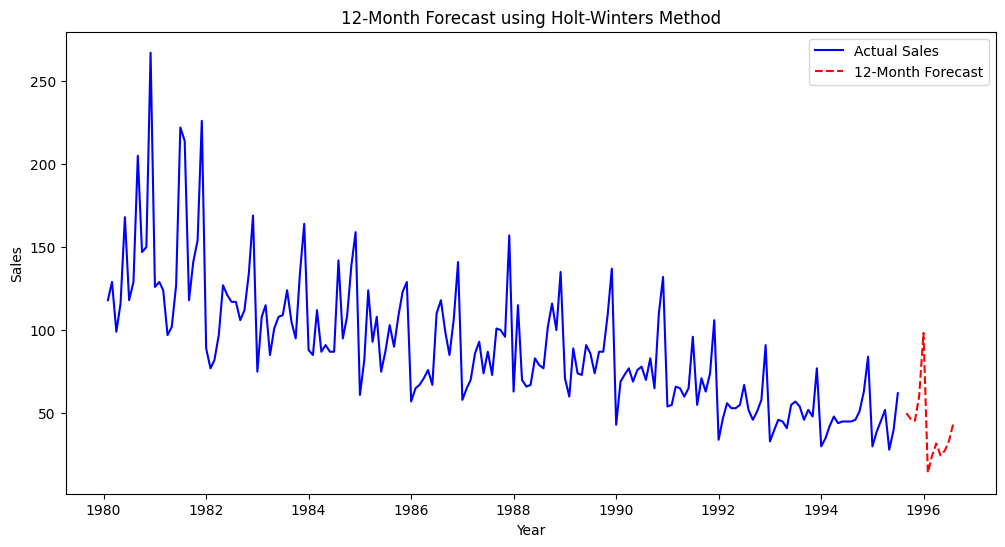

,Date,Forecasted_Sales
1995-08-01,1995-08-31,49.994427
1995-09-01,1995-09-30,46.574688
1995-10-01,1995-10-31,45.416014
1995-11-01,1995-11-30,60.130458
1995-12-01,1995-12-31,98.314161
1996-01-01,1996-01-31,14.155024
1996-02-01,1996-02-29,24.074055
1996-03-01,1996-03-31,31.772917
1996-04-01,1996-04-30,24.629679
1996-05-01,1996-05-31,27.466745


In [93]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Rebuilding the Holt-Winters model using the entire dataset
best_model = ExponentialSmoothing(
    da['Rose_Sales'],  # Replace with actual column name
    trend='add',
    seasonal='add',
    seasonal_periods=12
).fit()

# Forecast the next 12 months
forecast_periods = 12
future_forecast = best_model.forecast(steps=forecast_periods)

# Create a date range for the forecast
future_dates = pd.date_range(start=da.index[-1], periods=forecast_periods + 1, freq='M')[1:]

# Convert forecast to a DataFrame
forecast_df = pd.DataFrame({'Date': future_dates, 'Forecasted_Sales': future_forecast})

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(da.index, da['Rose_Sales'], label="Actual Sales", color="blue")
plt.plot(forecast_df['Date'], forecast_df['Forecasted_Sales'], label="12-Month Forecast", color="red", linestyle="dashed")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("12-Month Forecast using Holt-Winters Method")
plt.legend()
plt.show()

# Display forecasted values
forecast_df
